In [ ]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn.linear_model import LinearRegression;
from sklearn.model_selection import train_test_split;
from sklearn.model_selection import cross_val_score;

In [ ]:
data = pd.read_csv("Salary_Data.csv")
data.shape

(30, 2)

In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
x = data[['YearsExperience']].values
y = data['Salary'].values

In [ ]:
#x = data.iloc[:,0].values.reshape(len(data),1)
#y = data.iloc[:,1].values

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=2);

In [ ]:
model=LinearRegression();

In [ ]:
model.fit(xtrain,ytrain);
ypred=model.predict(xtest);

In [ ]:
c


array([36833.63210301, 34919.71472592, 67456.3101364 , 59800.64062805,
       92337.23603852, 81810.69046455])

In [ ]:
ytest

array([46205., 39343., 61111., 57189., 98273., 93940.])

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(ytest, ypred))
print('MSE:', metrics.mean_squared_error(ytest, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

MAE: 6802.779572073898
MSE: 56137509.9978255
RMSE: 7492.496913434499


In [ ]:
from sklearn.metrics import r2_score;
score=r2_score(ytest,ypred);

In [ ]:
score

0.8886956733784565

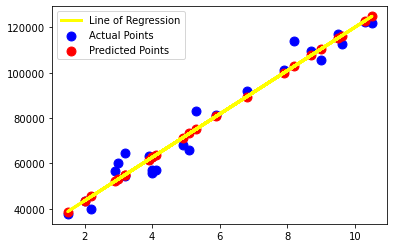

In [ ]:
### Draw line of regression (Training Samples)
plt.scatter(xtrain,ytrain,color="blue",label="Actual Points",s=80)
plt.scatter(xtrain,model.predict(xtrain),color="red",label="Predicted Points",s=80)
plt.plot(xtrain,model.predict(xtrain),color='yellow',lw=3,label="Line of Regression")
plt.legend()
plt.show()

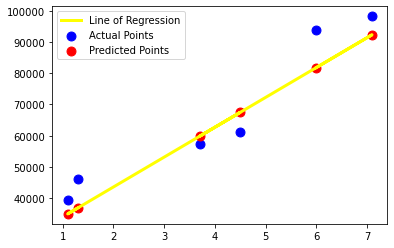

In [ ]:
### Draw line of regression (Testing Samples)
plt.scatter(xtest,ytest,color="blue",label="Actual Points",s=80)
plt.scatter(xtest,model.predict(xtest),color="red",label="Predicted Points",s=80)
plt.plot(xtest,model.predict(xtest),color='yellow',lw=3,label="Line of Regression")
plt.legend()
plt.show()

In [ ]:
model.intercept_

24393.16915194835

In [ ]:
accuracy = []
for i in range(501):
  xtrain_1,xtest_1,ytrain_1,ytest_1 = train_test_split(x,y,train_size=0.80,random_state=i)
  model_1 = LinearRegression()
  model_1.fit(xtrain_1,ytrain_1)
  ypred_1 = model_1.predict(xtest_1)
  score_1 = r2_score(ytest_1,ypred_1)
  accuracy.append(score_1)

In [ ]:
import numpy as np
print(np.max(accuracy))
print(np.argmax(accuracy))

0.9952429110093546
200


In [ ]:
model.predict([[15]])[0]

167936.97243344132

In [ ]:
def salary():
  exp = float(input("Enter Work Experience in Years:"))
  sal = model.predict([[exp]])
  print("The expected salary would be "+str(round(sal[0],2)))

In [ ]:
salary()

Enter Work Experience in Years: 4


The expected salary would be 62671.52


In [ ]:
import joblib
joblib.dump(model,"salary.pkl");

In [ ]:
mymodel = joblib.load("salary.pkl");

In [ ]:
round(mymodel.predict([[15]])[0],2)

167936.97

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(ytest, predictions))
print('MSE:', metrics.mean_squared_error(ytest, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictions)))

NameError: name 'ytest' is not defined